# Analysing dataset of universities for university task

## Requirements to run:
- Jupyter notebook installed
- Python 3 (my version was 3.7.6)
- Installed modules below
- Default notebook should be with outputs and results

In [1]:
import optuna
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVR
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

RANDOM_STATE = 42
TEST_SIZE = 0.15

### Reading dataset from github repository

In [2]:
url = 'https://raw.githubusercontent.com/nguyen-toan/ISLR/master/dataset/College.csv'
df = pd.read_csv(url, error_bad_lines=False)

In [3]:
df.head(5)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
df.groupby('Private').count()

,Unnamed: 0,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Private,,,,,,,,,,,,,,,,,,
No,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212
Yes,565,565,565,565,565,565,565,565,565,565,565,565,565,565,565,565,565,565


### Checking if there are gaps or missing data

In [5]:
df.isnull().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [6]:
if df.isnull().values.any():
  print('There are some gaps in dataset')

### Preprocessing data

In [7]:
df.rename(columns={'Unnamed: 0': 'University'}, inplace=True)
label_encoder = LabelEncoder()
df.iloc[:, 1] = label_encoder.fit_transform(df.iloc[:,1]).astype('int')

In [8]:
df.head(5)

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [9]:
df.groupby('Private').count()

,University,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Private,,,,,,,,,,,,,,,,,,
0,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212
1,565,565,565,565,565,565,565,565,565,565,565,565,565,565,565,565,565,565


### Checking the influences and importances of variables for output vector before any processing
#### For research of influences and importances of variables crucial and deciding option is to standardize data

In [10]:
target = df['Apps']
df_copy = df.copy()
X = df_copy.drop(['University', 'Apps'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X.values, target.values, test_size=TEST_SIZE, 
                                                    random_state=RANDOM_STATE)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True,
                           bootstrap=True, random_state=RANDOM_STATE)
rf.fit(X_train, y_train)
print('Random Forest \nR^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Test Score: {:.2f}'
      .format(rf.score(X_train, y_train), rf.oob_score_, rf.score(X_test, y_test)))

Random Forest 
R^2 Training Score: 0.98 
OOB Score: 0.84 
R^2 Test Score: 0.93


Text(0.5, 1.0, 'Importances of variables for Apps in Random Forest')

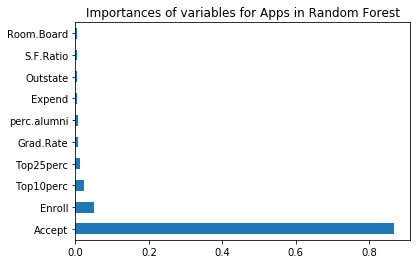

In [12]:
(pd.Series(rf.feature_importances_, index=X.columns).nlargest(10).plot(kind='barh'))
plt.title('Importances of variables for Apps in Random Forest')

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Linear Regression \nR^2 Training Score: {:.2f} \nR^2 Test Score: {:.2f}'
      .format(lr.score(X_train, y_train), lr.score(X_test, y_test)))

Linear Regression 
R^2 Training Score: 0.93 
R^2 Test Score: 0.91


Text(0.5, 1.0, 'Importances of variables for Apps in Linear Regression')

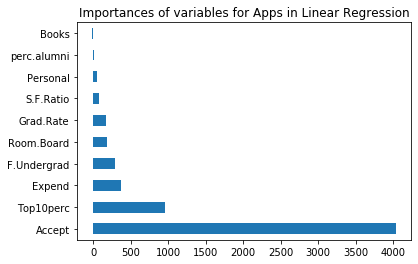

In [14]:
(pd.Series(lr.coef_, index=X.columns).nlargest(10).plot(kind='barh'))
plt.title('Importances of variables for Apps in Linear Regression')

In [15]:
svr = SVR(C=1.0, epsilon=0.2, kernel='linear')
svr.fit(X_train, y_train)
print('SVR \nR^2 Training Score: {:.2f} \nR^2 Test Score: {:.2f}'
      .format(svr.score(X_train, y_train), svr.score(X_test, y_test)))

SVR 
R^2 Training Score: 0.43 
R^2 Test Score: 0.54


Text(0.5, 1.0, 'Importances of variables for Apps in SVR')

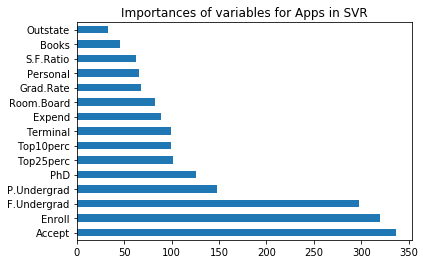

In [16]:
(pd.Series(svr.coef_[0], index=X.columns).nlargest(15).plot(kind='barh'))
plt.title('Importances of variables for Apps in SVR')

####  The most interesting distribution has SVR which included more features and gives them better distribution, but the expense is R squared metric and it's much worse value with comparison to other regressors

### Correlation between variables
#### Correlation is a statistical term which in common usage refers to how close two variables are to having a linear relationship with each other.
##### Pandas module automatically removing gaps or categorical variables if exist and weren't encoded

In [17]:
corr = df.corr()
corr

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Private,1.000000,-0.432095,-0.475252,-0.567908,0.164132,0.095752,-0.615561,-0.452088,0.552650,0.340532,-0.018549,-0.304485,-0.156714,-0.129620,-0.472205,0.414775,0.258461,0.336162
Apps,-0.432095,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,-0.475252,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,-0.567908,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.164132,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.095752,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,-0.615561,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,-0.452088,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.552650,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.340532,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942


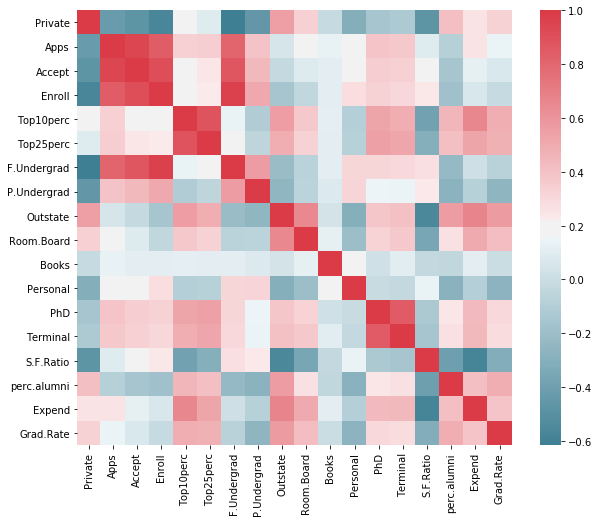

In [18]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

#### A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neutral or zero, meaning that the variables are unrelated.

##### One thing to note here is that there is not much sense in interpreting the correlation for 'Private', as it is a binary variable and different methods should be used for it.

### Selecting features based on correlation
#### Variables with correlation higher than 0.9 will be removed
##### Highly correlated features are redundant and this is useless to keep both features with for predicting target

In [19]:
all_features = df.drop(['University', 'Apps'], axis=1)
corr = all_features.corr()

In [20]:
def processing_correlated_features(data, corr):
    columns = np.full((corr.shape[0],), True, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= 0.9:
                if columns[j]:
                    columns[j] = False
    selected_columns = data.columns[columns]
    
    return data[selected_columns]

In [21]:
features = processing_correlated_features(all_features, corr)
features

,Private,Accept,Top10perc,Top25perc,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1232,23,52,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,1924,16,29,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1097,22,50,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,349,60,89,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,146,16,44,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0,1515,4,26,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1,1805,24,47,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,1,1915,34,61,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,1,2453,95,99,83,19840,6510,630,2115,96,96,5.8,49,40386,99


### p-values for variables

In [22]:
X2 = sm.add_constant(features)
est = sm.OLS(df['Apps'].values, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     636.4
Date:                Sat, 13 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:26:48   Log-Likelihood:                -6508.5
No. Observations:                 777   AIC:                         1.305e+04
Df Residuals:                     761   BIC:                         1.312e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -661.5879    414.558     -1.596      

In [23]:
target = df['Apps']
features.describe()

,Private,Accept,Top10perc,Top25perc,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,0.727156,2018.804376,27.558559,55.796654,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,0.445708,2451.113971,17.640364,19.804778,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,0.000000,72.000000,1.000000,9.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,0.000000,604.000000,15.000000,41.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1.000000,1110.000000,23.000000,54.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,1.000000,2424.000000,35.000000,69.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,1.000000,26330.000000,96.000000,100.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [24]:
X_train, X_test, y_train, y_test = train_test_split(features.values, target.values, test_size=TEST_SIZE, 
                                                    random_state=RANDOM_STATE)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True,
                           bootstrap=True, random_state=RANDOM_STATE)
rf.fit(X_train, y_train)
print('Random Forest \nR^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Test Score: {:.2f}'
      .format(rf.score(X_train, y_train), rf.oob_score_, rf.score(X_test, y_test)))

Random Forest 
R^2 Training Score: 0.98 
OOB Score: 0.85 
R^2 Test Score: 0.93


#### As it is possible to notice that after selecting features and removing redundant R^2 and Out-of-bag error are identical (with almost the same values)

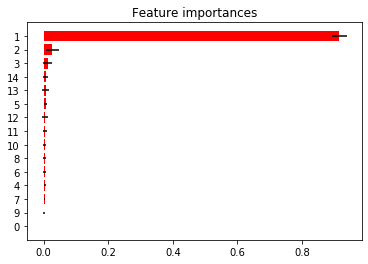

In [26]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X_test.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(features.shape[1]), indices)
plt.ylim([-1, features.shape[1]])
plt.show()

#### Above feature importances with standard deviation

Text(0.5, 1.0, 'Importances of variables for Apps in Random Forest')

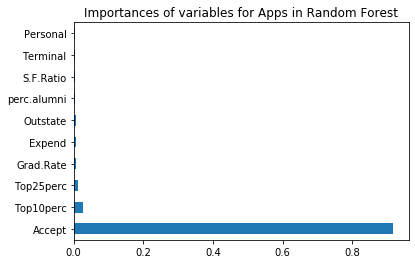

In [27]:
(pd.Series(rf.feature_importances_, index=features.columns).nlargest(10).plot(kind='barh'))
plt.title('Importances of variables for Apps in Random Forest')

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Linear Regression \nR^2 Training Score: {:.2f} \nR^2 Test Score: {:.2f}'
      .format(lr.score(X_train, y_train), lr.score(X_test, y_test)))

Linear Regression 
R^2 Training Score: 0.93 
R^2 Test Score: 0.91


Text(0.5, 1.0, 'Importances of variables for Apps in Linear Regression')

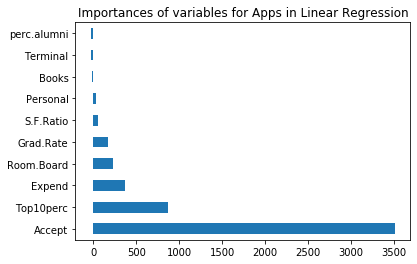

In [29]:
(pd.Series(lr.coef_, index=features.columns).nlargest(10).plot(kind='barh'))
plt.title('Importances of variables for Apps in Linear Regression')

In [30]:
svr = SVR(C=1.0, epsilon=0.2, kernel='linear')
svr.fit(X_train, y_train)
print('SVR \nR^2 Training Score: {:.2f} \nR^2 Test Score: {:.2f}'
      .format(svr.score(X_train, y_train), svr.score(X_test, y_test)))

SVR 
R^2 Training Score: 0.24 
R^2 Test Score: 0.29


Text(0.5, 1.0, 'Importances of variables for Apps in SVR')

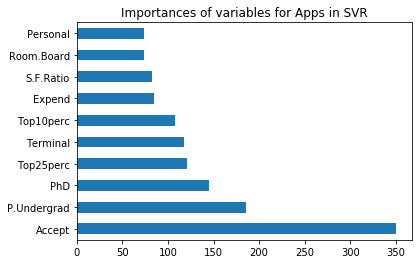

In [31]:
(pd.Series(svr.coef_[0], index=features.columns).nlargest(10).plot(kind='barh'))
plt.title('Importances of variables for Apps in SVR')

### Summary
#### Feature selection as it is possible to expect has more meaning for linear regression that random forest regressor
#### It is possible to notice that features in linear regression has better distribution of feature importances and distribution is not dominated by single feature
#### Interesting distribution has SVR which included more features and gives them better distribution. Worth on mention is that svr has linear kernel which setting and allows svr similiar behaviour to linear regression

### Selecting features based p-value

####  It is possible to select features based on p-value, but it is only statistical information about probability of hypothesis and it might have not always the best correlation during model prediction and it might have wrong influence for model during that approach but anyway it is always good for test

In [32]:
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    print(regressor_OLS.summary())
    
    return x, columns

In [33]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(features.values, target.values, 
                                                     SL, features.columns.tolist())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              1753.
Date:                Sat, 13 Jun 2020   Prob (F-statistic):                        0.00
Time:                        16:26:51   Log-Likelihood:                         -6511.3
No. Observations:                 777   AIC:                                  1.304e+04
Df Residuals:                     768   BIC:                                  1.308e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [34]:
data_with_p_value = pd.DataFrame(data=data_modeled, columns=selected_columns)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(data_with_p_value.values, target.values, 
                                                    test_size=TEST_SIZE, random_state=RANDOM_STATE)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
lr_p_selection = LinearRegression()
lr_p_selection.fit(X_train_p, y_train_p)
print('Linear Regression \nR^2 Training Score: {:.2f} \nR^2 Test Score: {:.2f}'
      .format(lr_p_selection.score(X_train_p, y_train_p), lr_p_selection.score(X_test_p, y_test_p)))

Linear Regression 
R^2 Training Score: 0.93 
R^2 Test Score: 0.92


Text(0.5, 1.0, 'Importances of variables for Apps in Linear Regression after selecting variables with p-value')

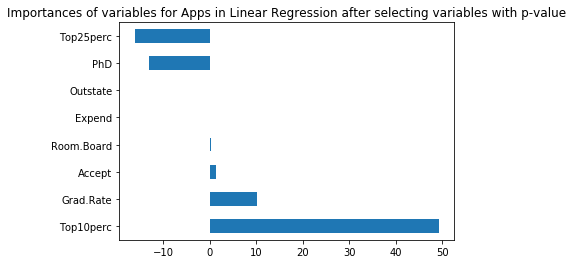

In [36]:
(pd.Series(lr_p_selection.coef_, index=data_with_p_value.columns).nlargest(8).plot(kind='barh'))
plt.title('Importances of variables for Apps in Linear Regression after selecting variables with p-value')

#### In that case feature selection with p-value after selecting by correlation almost doesn't change anything

### Plotting and comparison of predictions

In [37]:
y_pred_rf = rf.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_svr = svr.predict(X_test)

In [38]:
df_test_preds = pd.DataFrame({'actual': y_test.flatten(), 
                             'pred_rf': y_pred_rf.flatten(),
                             'pred_lr': y_pred_lr.flatten(),
                             'pred_svr': y_pred_svr.flatten()})
df_test_preds

,actual,pred_rf,pred_lr,pred_svr
0,4877,3925.85,3949.429857,2333.532203
1,2281,2916.14,2819.923004,2017.013166
2,6855,8156.37,8414.307214,3245.751910
3,342,321.35,114.131243,1201.919286
4,592,639.67,227.926631,1360.286757
...,...,...,...,...
112,19152,17467.22,20183.271592,4703.745759
113,1011,714.62,285.744414,1490.834418
114,464,507.64,415.967976,256.568415
115,4010,3661.63,3779.379476,2196.714536


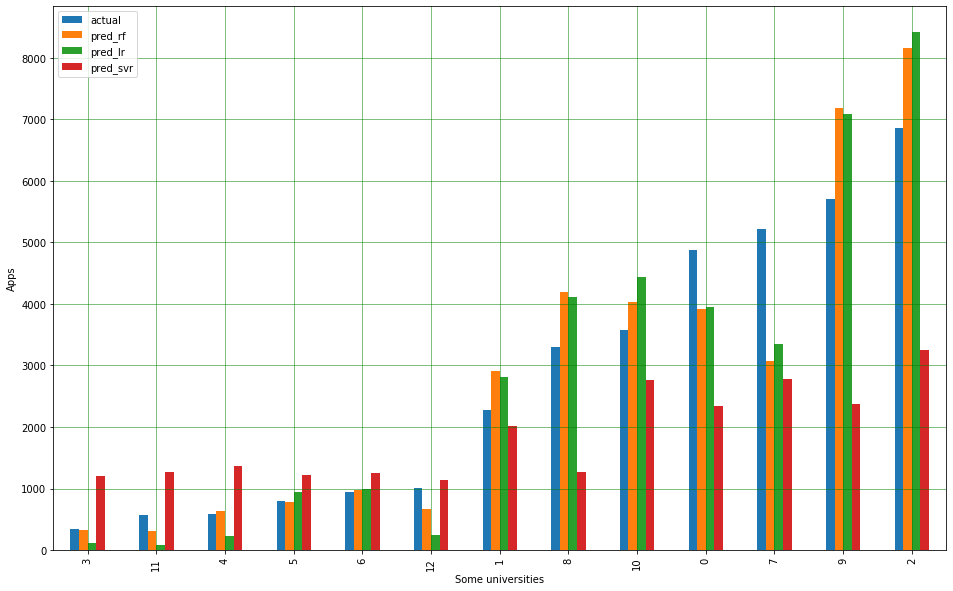

In [39]:
df_test_preds_vis = df_test_preds.loc[0:12]
df_test_preds_vis= df_test_preds_vis.sort_values(by=['actual'])
df_test_preds_vis.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Some universities')
plt.ylabel('Apps')
plt.show()

#### It is possible to notice much worst results for SVR

### Tunning hyperparameters for SVR

In [40]:
X_train, X_test, y_train, y_test = train_test_split(features.values, target.values, test_size=TEST_SIZE, 
                                                    random_state=RANDOM_STATE)
n_train = int(X_train.shape[0] * (1-TEST_SIZE))
X_train, X_val = X_train[:n_train], X_train[n_train:]
y_train, y_val = y_train[:n_train], y_train[n_train:]

#### Data standarization

In [41]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [42]:
def objective(trial):
    # C
    svr_c = trial.suggest_loguniform('svr_c', 45e0, 65e0)
    # epsilon
    svr_epsilon = trial.suggest_loguniform('svr_epsilon', 0.1e0, 2e0)
    
    svr = SVR(C=svr_c, epsilon=svr_epsilon)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_val)
    
    # Crossvalidation & MSE
    return mean_squared_error(y_val, y_pred)

In [43]:
study = optuna.create_study()
study.optimize(objective, n_trials=200)
print(study.best_params)
print(study.best_value)
print(study.best_trial)

[I 2020-06-13 16:26:52,814] Finished trial#0 with value: 17537232.13048281 with parameters: {'svr_c': 47.35619412382427, 'svr_epsilon': 0.41387410693956167}. Best is trial#0 with value: 17537232.13048281.
[I 2020-06-13 16:26:53,055] Finished trial#1 with value: 16458225.22923445 with parameters: {'svr_c': 62.688873703373, 'svr_epsilon': 0.24002366815212883}. Best is trial#1 with value: 16458225.22923445.
[I 2020-06-13 16:26:53,229] Finished trial#2 with value: 16603282.851827776 with parameters: {'svr_c': 60.72099365372088, 'svr_epsilon': 0.6431669872463122}. Best is trial#1 with value: 16458225.22923445.
[I 2020-06-13 16:26:53,396] Finished trial#3 with value: 17396781.977474086 with parameters: {'svr_c': 48.974913508328505, 'svr_epsilon': 0.37664564451875554}. Best is trial#1 with value: 16458225.22923445.
[I 2020-06-13 16:26:53,573] Finished trial#4 with value: 17034008.548663456 with parameters: {'svr_c': 53.733945360204665, 'svr_epsilon': 0.31498342317752237}. Best is trial#1 with

[I 2020-06-13 16:27:07,972] Finished trial#78 with value: 16385572.73614459 with parameters: {'svr_c': 63.63659608063337, 'svr_epsilon': 0.10688323716013652}. Best is trial#57 with value: 16282542.03896815.
[I 2020-06-13 16:27:08,139] Finished trial#79 with value: 16335604.581292301 with parameters: {'svr_c': 64.29208087103162, 'svr_epsilon': 0.12460511566060235}. Best is trial#57 with value: 16282542.03896815.
[I 2020-06-13 16:27:08,303] Finished trial#80 with value: 16463669.498273084 with parameters: {'svr_c': 62.619046199730704, 'svr_epsilon': 0.1093442606709369}. Best is trial#57 with value: 16282542.03896815.
[I 2020-06-13 16:27:08,481] Finished trial#81 with value: 16282892.700465463 with parameters: {'svr_c': 64.98599929573486, 'svr_epsilon': 0.14186038437461976}. Best is trial#57 with value: 16282542.03896815.
[I 2020-06-13 16:27:08,640] Finished trial#82 with value: 16284065.123891886 with parameters: {'svr_c': 64.96997901346295, 'svr_epsilon': 0.16780102402066974}. Best is t

[I 2020-06-13 16:27:21,291] Finished trial#156 with value: 16312937.370402992 with parameters: {'svr_c': 64.58321539250427, 'svr_epsilon': 0.4712475199831807}. Best is trial#148 with value: 16281613.552956287.
[I 2020-06-13 16:27:21,443] Finished trial#157 with value: 16349261.490441177 with parameters: {'svr_c': 64.10718590583944, 'svr_epsilon': 0.3919949897555858}. Best is trial#148 with value: 16281613.552956287.
[I 2020-06-13 16:27:21,595] Finished trial#158 with value: 16283007.502664147 with parameters: {'svr_c': 64.9808419148588, 'svr_epsilon': 0.31621491914240607}. Best is trial#148 with value: 16281613.552956287.
[I 2020-06-13 16:27:21,759] Finished trial#159 with value: 16281682.203208437 with parameters: {'svr_c': 64.99920715126304, 'svr_epsilon': 0.27443935499608685}. Best is trial#148 with value: 16281613.552956287.
[I 2020-06-13 16:27:21,998] Finished trial#160 with value: 16282817.898347959 with parameters: {'svr_c': 64.97906572537985, 'svr_epsilon': 0.5215636635953299}.

{'svr_c': 64.99442894537977, 'svr_epsilon': 1.7252866791960053}
16280341.070888825
FrozenTrial(number=181, value=16280341.070888825, datetime_start=datetime.datetime(2020, 6, 13, 16, 27, 25, 452089), datetime_complete=datetime.datetime(2020, 6, 13, 16, 27, 25, 671021), params={'svr_c': 64.99442894537977, 'svr_epsilon': 1.7252866791960053}, distributions={'svr_c': LogUniformDistribution(high=65.0, low=45.0), 'svr_epsilon': LogUniformDistribution(high=2.0, low=0.1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=181, state=TrialState.COMPLETE)


In [44]:
history_study_df = study.trials_dataframe()
history_study_df

,number,value,datetime_start,datetime_complete,duration,params_svr_c,params_svr_epsilon,state
0,0,1.753723e+07,2020-06-13 16:26:52.621342,2020-06-13 16:26:52.813161,00:00:00.191819,47.356194,0.413874,COMPLETE
1,1,1.645823e+07,2020-06-13 16:26:52.826864,2020-06-13 16:26:53.055949,00:00:00.229085,62.688874,0.240024,COMPLETE
2,2,1.660328e+07,2020-06-13 16:26:53.063955,2020-06-13 16:26:53.228008,00:00:00.164053,60.720994,0.643167,COMPLETE
3,3,1.739678e+07,2020-06-13 16:26:53.231006,2020-06-13 16:26:53.396705,00:00:00.165699,48.974914,0.376646,COMPLETE
4,4,1.703401e+07,2020-06-13 16:26:53.400722,2020-06-13 16:26:53.573708,00:00:00.172986,53.733945,0.314983,COMPLETE
...,...,...,...,...,...,...,...,...
195,195,1.628651e+07,2020-06-13 16:27:28.470891,2020-06-13 16:27:28.652459,00:00:00.181568,64.922780,0.896739,COMPLETE
196,196,1.628250e+07,2020-06-13 16:27:28.656445,2020-06-13 16:27:28.843614,00:00:00.187169,64.978383,0.764511,COMPLETE
197,197,1.631696e+07,2020-06-13 16:27:28.853558,2020-06-13 16:27:29.054573,00:00:00.201015,64.523894,0.782077,COMPLETE
198,198,1.628476e+07,2020-06-13 16:27:29.057576,2020-06-13 16:27:29.328436,00:00:00.270860,64.947698,0.807025,COMPLETE


In [45]:
svr_tunned = SVR(C=55, epsilon=1, kernel='linear')
svr_tunned.fit(X_train, y_train)

SVR(C=55, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [46]:
y_pred_val = svr_tunned.predict(X_val)
y_pred_test_svr = svr_tunned.predict(X_test)
val_r2 = r2_score(y_val, y_pred_val)
test_r2 = r2_score(y_test, y_pred_test_svr)
print('R^2 on val dataset {}'.format(val_r2))
print('R^2 on test dataset {}'.format(test_r2))

R^2 on val dataset 0.9022201875470017
R^2 on test dataset 0.9172640946556182


Text(0.5, 1.0, 'Importances of variables for Apps in SVR after tuning hyperparameters')

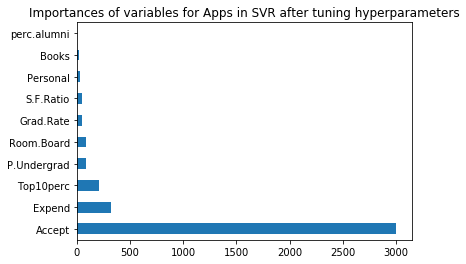

In [47]:
(pd.Series(svr_tunned.coef_[0], index=features.columns).nlargest(10).plot(kind='barh'))
plt.title('Importances of variables for Apps in SVR after tuning hyperparameters')

#### Creating Random Forest and Linear Regression for afresh prediction on new data and for visualization purposes with comparison

In [48]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True,
                           bootstrap=True, random_state=RANDOM_STATE)
rf.fit(X_train, y_train)
y_pred_test_rf = rf.predict(X_test)

In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_test_lr = lr.predict(X_test)

In [50]:
df_test_preds = pd.DataFrame({'actual': y_test.flatten(), 
                             'pred_rf': y_pred_test_rf.flatten(),
                             'pred_lr': y_pred_test_lr.flatten(),
                             'pred_svr': y_pred_test_svr.flatten()})
df_test_preds

,actual,pred_rf,pred_lr,pred_svr
0,4877,3771.77,3815.777987,3678.284194
1,2281,2693.50,2708.779815,2539.657121
2,6855,8155.32,8505.419650,7752.240372
3,342,294.32,108.525261,304.295694
4,592,643.50,235.723807,580.015204
...,...,...,...,...
112,19152,16826.41,20645.303984,17486.197986
113,1011,708.34,264.686600,690.280070
114,464,509.78,511.491354,477.566707
115,4010,3713.74,3840.310860,3470.471322


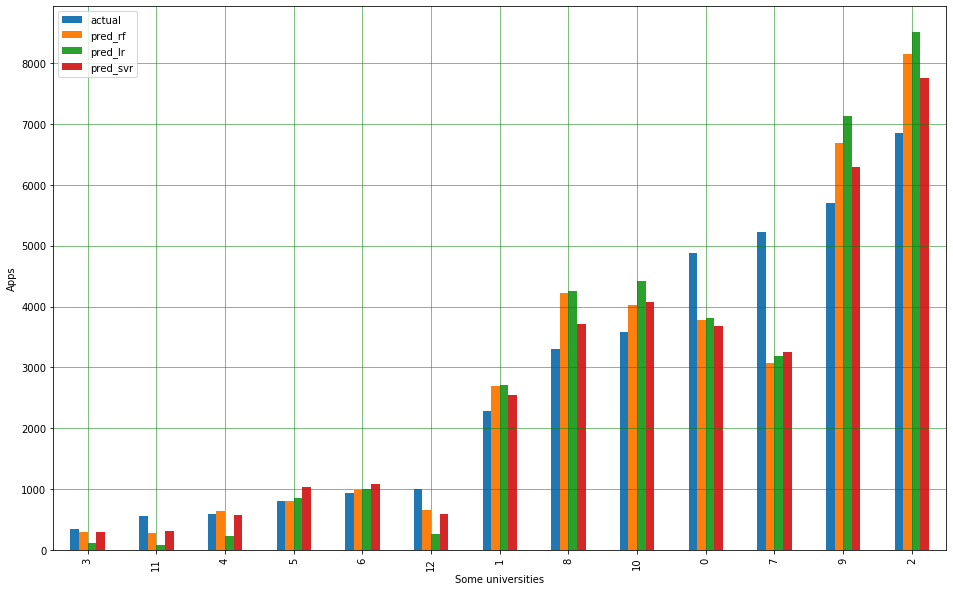

In [51]:
df_test_preds_vis = df_test_preds.loc[0:12]
df_test_preds_vis= df_test_preds_vis.sort_values(by=['actual'])
df_test_preds_vis.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Some universities')
plt.ylabel('Apps')
plt.show()

#### As it is possible to notice that tuning of hyperparameters for SVR helps a lot to improve results